# Utiliser Pandas : Enquête sur la science ouverte

Reproduction

Mariannig Le Béchec - Aline Bouchard - Philippe Charrier - Claire Denecker - Gabriel Gallezot - Stéphanie Rennes

- Rapport : https://hal.archives-ouvertes.fr/hal-03545512v1
- Données : https://zenodo.org/record/5827206


## Objectifs 

1. Rendre les données vivantes
2. Explorer les données
3. Produire de nouveaux traitements (par exemple : qui utilise R & Python)
4. Visualiser

## 1. Rendre les données vivantes

## 1.1 Charger les données

Utilisation de la bibliothèque Pandas

In [3]:
import pandas as pd
data = pd.read_csv("../data/SOSP_Export_base de données diffusable.csv")
data.head()

,Id,contexte_travail,fonction_recherche,statut_professionnel,statut_professionnel_Autre,annee_premiere_publi,Systeme_exploitation,Usage_telephone_mobile,Outils_gestion_travail_av_confinement_visioconférence,Outils_gestion_travail_av_confinement_planification_RDV,...,Souhait_partage_donnees_produites_discipline,Souhait_partage_donnees_produites_pays_continent,Souhait_partage_donnees_produites_domaine_economique,Souhait_partage_donnees_produites_secteur_associatif,Souhait_partage_donnees_produites_sans_restriction,compatibilite_diffusion_partage,evolutions_pratiques_numeriques,sexe,disciplines_9niv,annee_de_naissance-recod10niv
0,1,nous sommes entre 6 et 10 personnes,professeur / professeure des universités et as...,fonctionnaire ou assimilé,NaN,1995,Windows,rarement,parfois,souvent,...,oui,oui,oui,oui,oui,oui,je ne sais pas,un homme,Sciences humaines,61 à 65 ans
1,2,nous sommes plus de 50 personnes,ingénieur / ingénieure de recherche,en CDI,NaN,2005,Windows,rarement,parfois,parfois,...,oui,oui,oui,oui,oui,NaN,NaN,un homme,Médecine,46 à 50 ans
2,3,nous sommes entre 2 et 5 personnes,maître / maîtresse de conférences et assimilés,fonctionnaire ou assimilé,NaN,2006,Windows,parfois,rarement,souvent,...,oui,oui,oui,oui,oui,"oui, tout est dans la chronologie",non,un homme,Médecine,36 à 40 ans
3,4,nous sommes entre 2 et 5 personnes,"directeur / directrice de recherche (CNRS, INS...",fonctionnaire ou assimilé,NaN,1989,Windows;autres OS (Android...),souvent,rarement,souvent,...,oui,oui,non,non,non,Oui,Aucune idée,une femme,Médecine,56 à 60 ans
4,5,nous sommes entre 2 et 5 personnes,doctorant / doctorante (y compris CIFRE),en CDD,NaN,2015,MacOS,souvent,rarement,parfois,...,oui,oui,oui,oui,oui,Oui,Oui,une femme,Médecine,31 à 35 ans


In [1]:
#list(data.columns)

Il est possible de les regarder par colonne ,par ligne...

Pendant que nous y sommes, chargeons les méta-données pour créer un dictionnaire des questions

In [5]:
questions = pd.read_csv("../data/SOSP_metadonnees_variables.csv")
questions = questions[31:]
dic_questions = dict(questions.set_index("Titre")["Listes des variables avec les questions et modalités associées"])
questions

,Titre,Listes des variables avec les questions et modalités associées,Unnamed: 2,Unnamed: 3,Unnamed: 4
31,ID,NaN,NaN,A,Identifiant de l’observé
32,contexte_travail,"Habituellement, pour une opération de recherch...",je travaille seul nous sommes entre 2 et 5 p...,B,NaN
33,fonction_recherche,Quelle est votre fonction dans la recherche ?,doctorant / doctorante (y compris CIFRE) maî...,C,NaN
34,statut_professionnel,Quel est votre statut professionnel ?,Fonctionnaire ou assimilé en CDD en CDI po...,D,NaN
35,statut_professionnel_autre,"Si, autre pouvez-vous préciser ?",Question ouverte,E,NaN
...,...,...,...,...,...
157,compatibilite_diffusion_partage\n,34 - Le partage et la diffusion des données vo...,Question ouverte,DW,mots anonymisés sous forme de XXXXX
158,evolutions_pratiques_numeriques,"35 - Selon vous, vos pratiques numériques vont...",Question ouverte,DX,mots anonymisés sous forme de XXXXX
159,sexe,Quel est votre genre ?,Une femme Un homme Je ne souhaite pas répondre,DY,NaN
160,Disciplines_9niv,Quelle est votre discipline principale de rech...,Sciences de l'ingénieur Sciences humaines\nSc...,DZ,recodage en 9 disciplines


## 1.2 Petite exploration des données

Un ensemble de fonctions

In [31]:
data["sexe"].unique()

array(['un homme', 'une femme', 'je ne souhaite pas répondre'],
      dtype=object)

In [6]:
data["sexe"].value_counts()

un homme                       565
une femme                      480
je ne souhaite pas répondre     44
Name: sexe, dtype: int64

Et peut-être aussi des outils plus spécifiques, comme PySHS

Si on veut faire des pourcentages

In [7]:
data["sexe"].value_counts()/len(data)

un homme                       0.518825
une femme                      0.440771
je ne souhaite pas répondre    0.040404
Name: sexe, dtype: float64

Possibilité de faire des statistiques

In [33]:
data["annee_premiere_publi"].mean()

2004.030303030303

In [34]:
data["annee_premiere_publi"].describe()

count    1089.000000
mean     2004.030303
std        11.362671
min      1968.000000
25%      1996.000000
50%      2005.000000
75%      2014.000000
max      2020.000000
Name: annee_premiere_publi, dtype: float64

## 2 Transformer les données pour répondre à une question

Avec l'identification de questions, de réflexions, etc.

Se concentrer sur un sous-ensembles de questions

- fonction_recherche
- statut_professionnel / statut_professionnel_Autre
- annee_premiere_publi
- Systeme_exploitation
- 'sexe'
- 'disciplines_9niv',
- 'annee_de_naissance-recod10niv'

Et à formuler des questions :

- qui utilise quel système d'exploitation ?
- qui utilise Python ou R ?
- etc.

### 2.1 Moment de recodage des variables

Il existe plusieurs stratégies de recodage des variables 

- spécifique : par exemple contains, replace
- générique, avec apply


Par exemple je veux recoder les statuts

In [39]:
data["fonction_recherche"].unique()

array(['professeur / professeure des universités et assimilés',
       'ingénieur / ingénieure de recherche',
       'maître / maîtresse de conférences et assimilés',
       'directeur / directrice de recherche (CNRS, INSERM, INRAE, CNES...)',
       'doctorant / doctorante (y compris CIFRE)',
       "ingénieur / ingénieure d'études",
       'chargé / chargée de recherche (CNRS, INSERM, INRAE, CNES...)',
       'chercheur / chercheure dans le secteur privé (ingénieur R&D, consultant, expert, chef de projet)',
       'responsable de service R&D dans le secteur privé'], dtype=object)

In [44]:
data["fonction_recherche"] = data["fonction_recherche"].replace({'professeur / professeure des universités et assimilés':"professeur"})

il est possible d'aller plus loin, et faire les recodages dont on a besoin

Un exemple sur les systèmes d'exploitation : toutes les combinaisons ne m'intéressent pas, je veux plutôt : usager Linux, Windows, Mac, et seul ou combinaison. Je vais donc créer une variable par système

In [63]:
data["OS_windows"] = data["Systeme_exploitation"].str.contains("Windows")
data["OS_linux"] = data["Systeme_exploitation"].str.contains("Linux|Unix")
data["OS_mac"] = data["Systeme_exploitation"].str.contains("Mac")
data["OS_multiples"] = data["Systeme_exploitation"].str.contains(";")

In [64]:
data["OS_multiples"].value_counts()

False    813
True     276
Name: OS_multiples, dtype: int64

Si maintenant on veut recoder le nombre d'OS

In [37]:
def count_os(x):
    return x.count(";")+1
data["Systeme_exploitation"].apply(count_os).value_counts()

1    813
2    220
3     48
4      8
Name: Systeme_exploitation, dtype: int64

## 3. Rajouter des dimensions aux données



Se concentrer sur les champs explicites d'un logiciel qui désigne le processus de travail

- logiciel_production_donnees
- outils_nettoyage
- Outils_analyses
- Outils_visualisation

(remarque en passant -> le nom des variables pourrait être mieux normalisé)

Opérations  que nous souhaitons faire

1. Regrouper les champs
2. Détecter la présence

Faire une analyse des principales réponses et construire une heuristique de détection : facile pour Python ou Excel, difficile pour R...

In [40]:
# Définir les colonnes concernées
var = ["logiciel_production_donnees","outils_nettoyage","Outils_analyses","Outils_visualisation"]

#Regrouper toutes les informations dans un seul champ
data["outils"] = data.apply(lambda x : " ".join([x[i] for i in var if pd.notnull(x[i])]),axis=1)
data["outils"] = data["outils"].apply(lambda x : x if x!="" else None)

Dire un mot sur la compréhension de liste

In [41]:
data["outils"].value_counts()

Word                                                                                                                          13
Aucun                                                                                                                          6
word                                                                                                                           5
latex                                                                                                                          4
Excel                                                                                                                          4
                                                                                                                              ..
word, excel, filmaker, qgis, photoscan                                                                                         1
J'utilise mes propres codes.\nParfois octave ou matlab. Mes propres codes\ngawk Mes propres outil

Définition d'heuristiques de détection (à améliorer potentiellement) pour détecter la présence : c'est la cuisine... et il vaut mieux connaître ses données pour cela

In [42]:
data["outils_R"] = data["outils"].str.contains("R,| R|R |\nR|R | r | r,|,r ")
data["outils_Python"] = data["outils"].str.lower().str.contains("python|pyton")
data["outils_Excel"] = data["outils"].str.lower().str.contains("excel|exel")
data["outils_Word"] = data["outils"].str.lower().str.contains("word")
data["outils_Matlab"] = data["outils"].str.lower().str.contains("matlab")

<AxesSubplot:title={'center':'Usage Excel'}>

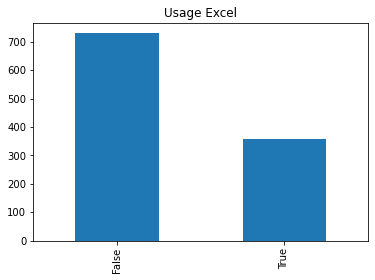

In [43]:
data["outils_Excel"].value_counts().plot(kind="bar",title="Usage Excel")

### Utilisation de bibliothèques tests / mise en forme

Création d'un tableau exploratoire

In [111]:
pyshs.tri_a_plat(data,"outils_R")

,Effectif,Pourcentage (%)
False,815.0,75.0
True,272.0,25.0
Total,1087.0,100.0


Faire un test

In [45]:
from scipy.stats import chi2_contingency

In [48]:
tab = pd.crosstab(data["outils_Python"],data["outils_R"])
tab

outils_R,False,True
outils_Python,,
False,693,226
True,122,46


In [49]:
chi2_contingency(tab)

Chi2ContingencyResult(statistic=0.44960512742154546, pvalue=0.5025225327085595, dof=1, expected_freq=array([[689.03863845, 229.96136155],
       [125.96136155,  42.03863845]]))

Des sorties un peu brutes

### Tableaux un peu plus finalisés

In [115]:
outils = {
"Excel":pyshs.tri_a_plat(data,"outils_Excel"),
"R":pyshs.tri_a_plat(data,"outils_R"),
"Python":pyshs.tri_a_plat(data,"outils_Python"),
"Matlab":pyshs.tri_a_plat(data,"outils_Matlab"), 
         }

tab = pd.concat(outils,axis=1)
tab

Excel                        R                   Python  \
      Effectif Pourcentage (%) Effectif Pourcentage (%) Effectif   
False    730.0            67.2    815.0            75.0    919.0   
True     357.0            32.8    272.0            25.0    168.0   
Total   1087.0           100.0   1087.0           100.0   1087.0   

                        Matlab                  
      Pourcentage (%) Effectif Pourcentage (%)  
False            84.5    973.0            89.5  
True             15.5    114.0            10.5  
Total           100.0   1087.0           100.0

Tableau croisé

In [119]:
pyshs.tableau_croise(data,"disciplines_9niv","outils_Python")

,False,True,Total
"Chimie, Matériaux",55 (93.2%),4 (6.8%),59 (100%)
Lettres et Arts,54 (93.1%),4 (6.9%),58 (100%)
"Mathématiques, Informatiques",94 (68.1%),44 (31.9%),138 (100%)
Médecine,48 (88.9%),6 (11.1%),54 (100%)
"Physique, Sciences de la terre et de l'Univers",60 (58.3%),43 (41.7%),103 (100%)
Science de l'ingénieur,59 (64.8%),32 (35.2%),91 (100%)
Sciences du vivant,125 (90.6%),13 (9.4%),138 (100%)
Sciences humaines,260 (94.9%),14 (5.1%),274 (100%)
Sciences sociales,152 (95.0%),8 (5.0%),160 (100%)
Total,907 (84.4%),168 (15.6%),1075 (100%)


### Pandas permet les opérations sur les tableaux (jointures, etc)

In [ ]:
dic = {'Sciences humaines':"Faible", 'Médecine':"Faible", 'Mathématiques, Informatiques':"Fort",
       'Sciences du vivant':"Moyen", 'Sciences sociales':"Faible", 'Lettres et Arts':"Faible",
       'Chimie, Matériaux':"Fort", "Science de l'ingénieur":"Fort",
       "Physique, Sciences de la terre et de l'Univers":"Fort"}

dic = pd.Series(dic,name="Codage")
data = data.join(dic,on="disciplines_9niv")

## 3. Faire un graphique


Out of the box

<AxesSubplot:ylabel='disciplines_9niv'>

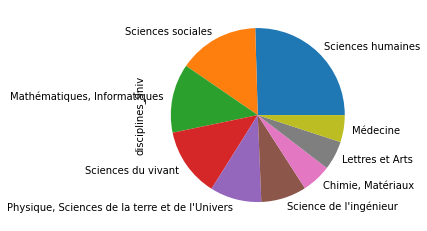

In [81]:
data["disciplines_9niv"].value_counts().plot(kind="pie")

Un peu mis en forme

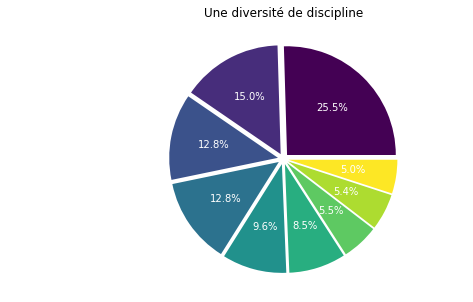

In [80]:
import matplotlib.pyplot as plt

# Définir l'écart entre les parts
exp = [0.05] * len(data["disciplines_9niv"].dropna().unique())

# Graphique avec options
data["disciplines_9niv"].value_counts().plot(kind="pie",
                                             cmap="viridis",
                                             figsize=(5,5),
                                             explode=exp, autopct='%1.1f%%', textprops={'color':"w"})
# Finaliser et sauvegarder
plt.ylabel("")
plt.title("Une diversité de discipline")
plt.savefig("Mon graphique.png",bbox_inches='tight')

La même en dynamique avec plotly : plus d'options de visualisation, etc.

In [36]:
import plotly.express as px

# Permettre l'affichage dans les slides
import plotly
plotly.offline.init_notebook_mode(connected=True)

# Afficher et compléter
df = pd.DataFrame(data["disciplines_9niv"].value_counts()) # Construction des données
fig = px.pie(df,names=df.index,values="disciplines_9niv", title='Une diversité de discipline')
fig.update_layout(font_family="Courier New", font_color="blue", title_font_family="Times New Roman",
                  title_font_color="orange", title_font_size=30)
fig.show()

Création d'une autre visualisation

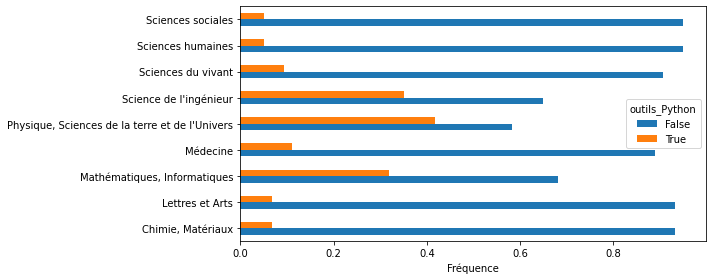

In [23]:
pd.crosstab(data["outils_Python"],data["disciplines_9niv"],
            normalize="columns").T.plot(kind="barh",figsize=(10,4))

# compléter et sauvegarder la figure
plt.ylabel("")
plt.xlabel("Fréquence")
plt.tight_layout()
plt.savefig("fig.png",dpi=300)

#### Visualisation juxtaposée (un peu) finalisée

Produire les données dans un cas

Généraliser avec la grammaire des figures de Matplotlib (grille de figures, etc.)

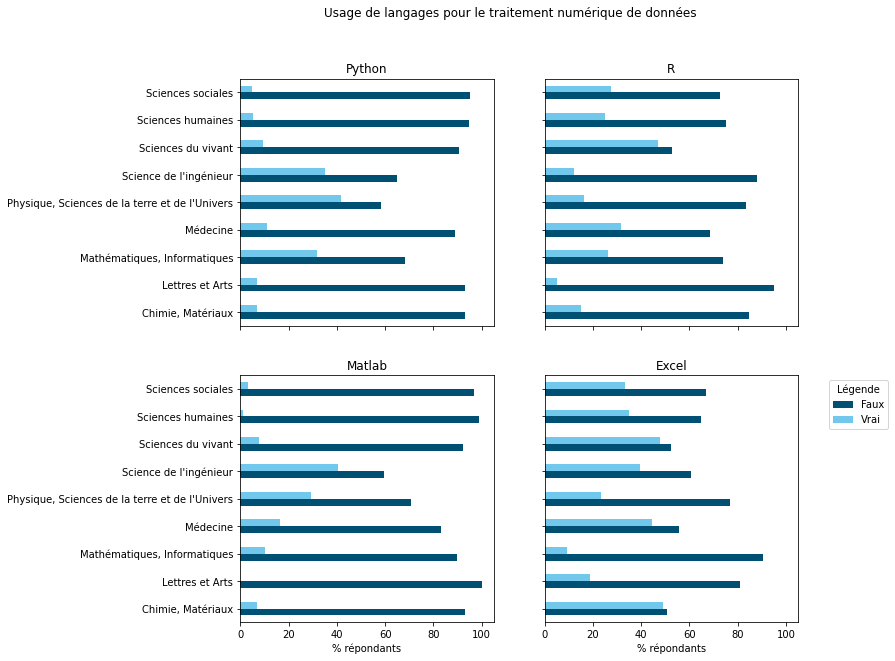

In [128]:
info = {"Python":"outils_Python","R":"outils_R","Matlab":"outils_Matlab","Excel":"outils_Excel"}

fig,ax = plt.subplots(2,2,figsize=(10,10),sharey=True,sharex=True)
plt.suptitle("Usage de langages pour le traitement numérique de données")

for graph,i in zip(ax.flatten(),info):
    tab = (100*pd.crosstab(data[info[i]],data["disciplines_9niv"],normalize="columns"))
    tab.T.plot(kind="barh",ax=graph, legend=False,color=["#005073","#71c7ec"])
    
    graph.set_ylabel("")
    graph.set_xlabel("% répondants")
    graph.set_title(i)

# Sauvegarde
plt.legend(title='Légende',labels=["Faux","Vrai"], bbox_to_anchor=(1.1, 1), loc='upper left')
plt.savefig("fig.png",dpi=300,bbox_inches='tight')

### 3.2 Allez plus loin


#### Modèle : régression logistique

Les facteurs qui pèsent sur l'usage de Python

In [141]:
# Création d'une variable indicatrice 0/1
data["outils_Python_B"] = data["outils_Python"].replace({True:1,False:0}).fillna(0)

# Mettre en forme les données pour éviter certains formats qui font des bugs
data["annee"] = data["annee_de_naissance-recod10niv"]

# Définition des variables indépendantes
var_ind = {"sexe":"Genre","disciplines_9niv":"Discipline","annee":"Age"}

# Calculer le modèle
pyshs.regression_logistique(data,"outils_Python_B",var_ind)

Odds Ratio        p  \
Variable   Modalité                                                             
.Intercept                                                      0.09  0.001**   
Age        25 à 30 ans                                           ref            
           31 à 35 ans                                          0.87    0.717   
           36 à 40 ans                                          1.19      0.6   
           41 à 45 ans                                          0.67    0.249   
           46 à 50 ans                                          0.59    0.131   
           51 à 55 ans                                          0.46    0.051   
           56 à 60 ans                                          0.48    0.076   
           61 à 65 ans                                          0.14  0.004**   
           66 ans et plus                                       0.24    0.083   
           moins de 25 ans                                      1.01    0.986   
Discipline Chimie, Matériaux                                     ref            
           Lettres et Arts                                      1.14    0.857   
           Mathématiques, Informatiques                         7.17   0.0***   
           Médecine                                             1.73    0.424   
           Physique, Sciences de la terre et de l'Univers      12.39   0.0***   
           Science de l'ingénieur                                7.7   0.0***   
           Sciences du vivant                                   1.66    0.402   
           Sciences humaines                                    0.79    0.686   
           Sciences sociales                                    0.71    0.589   
Genre      je ne souhaite pas répondre                           ref            
           un homme                                             1.01    0.988   
           une femme                                            1.28    0.627   

                                                                       IC 95%  
Variable   Modalité                                                            
.Intercept                                                   0.09 [0.02-0.36]  
Age        25 à 30 ans                                                         
           31 à 35 ans                                       0.87 [0.42-1.81]  
           36 à 40 ans                                       1.19 [0.62-2.30]  
           41 à 45 ans                                       0.67 [0.34-1.32]  
           46 à 50 ans                                       0.59 [0.30-1.17]  
           51 à 55 ans                                       0.46 [0.21-1.00]  
           56 à 60 ans                                       0.48 [0.21-1.08]  
           61 à 65 ans                                       0.14 [0.04-0.54]  
           66 ans et plus                                    0.24 [0.05-1.20]  
           moins de 25 ans                                   1.01 [0.36-2.81]  
Discipline Chimie, Matériaux                                                   
           Lettres et Arts                                   1.14 [0.27-4.88]  
           Mathématiques, Informatiques                     7.17 [2.41-21.34]  
           Médecine                                          1.73 [0.45-6.60]  
           Physique, Sciences de la terre et de l'Univers  12.39 [4.09-37.55]  
           Science de l'ingénieur                           7.70 [2.52-23.51]  
           Sciences du vivant                                1.66 [0.51-5.37]  
           Sciences humaines                                 0.79 [0.25-2.51]  
           Sciences sociales                                 0.71 [0.20-2.47]  
Genre      je ne souhaite pas répondre                                         
           un homme                                          1.01 [0.37-2.71]  
           une femme                                         1.28 [0.48-3.43]